## Image Resize

In [34]:
#!/usr/bin/python
from PIL import Image
import os, sys

path = "C:/Users/JeanMichel/Desktop\Github_repositories/BARS/datasets/train/cass/"
dirs = os.listdir( path )



In [37]:
def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((224,224), Image.ANTIALIAS)
            imResize.save(path + 'resized/'+ item , 'JPEG', quality=90)
            
resize()

## Package Import & Image Loading

In [48]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt

fps = glob.glob("C:/Users/JeanMichel/Desktop/Github_repositories/BARS/datasets/train/cass/resized/*.png")

images = np.array(
    [cv2.cvtColor(cv2.imread(fp), cv2.COLOR_BGR2RGB) for fp in fps], # image batch size fps 크기로 조정
    dtype = np.uint8
)
print(images.shape)

(698, 224, 224, 3)


In [49]:
images

array([[[[103, 104,  99],
         [103, 104,  99],
         [103, 104,  99],
         ...,
         [140, 151, 145],
         [141, 152, 146],
         [141, 152, 146]],

        [[103, 104,  99],
         [103, 104,  99],
         [103, 104,  99],
         ...,
         [140, 151, 145],
         [141, 152, 146],
         [141, 152, 146]],

        [[103, 104,  99],
         [103, 104,  99],
         [103, 104,  99],
         ...,
         [141, 152, 146],
         [141, 152, 146],
         [141, 152, 146]],

        ...,

        [[100,  72,  48],
         [100,  72,  48],
         [100,  72,  48],
         ...,
         [114,  91,  75],
         [113,  90,  72],
         [113,  90,  72]],

        [[101,  73,  49],
         [101,  73,  49],
         [101,  73,  49],
         ...,
         [114,  91,  73],
         [114,  91,  73],
         [113,  90,  72]],

        [[101,  73,  49],
         [101,  73,  49],
         [101,  73,  49],
         ...,
         [112,  89,  71],
        

## Define Augmenter 

### case 1 ) Crop, Flip, GaussianBlur

In [50]:
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])

images_aug = seq(images=images)
print(images_aug.shape)

(698, 224, 224, 3)


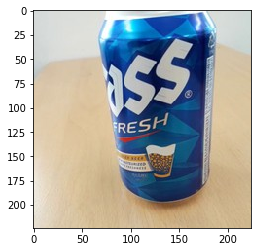

In [52]:
plt.imshow(images[32])

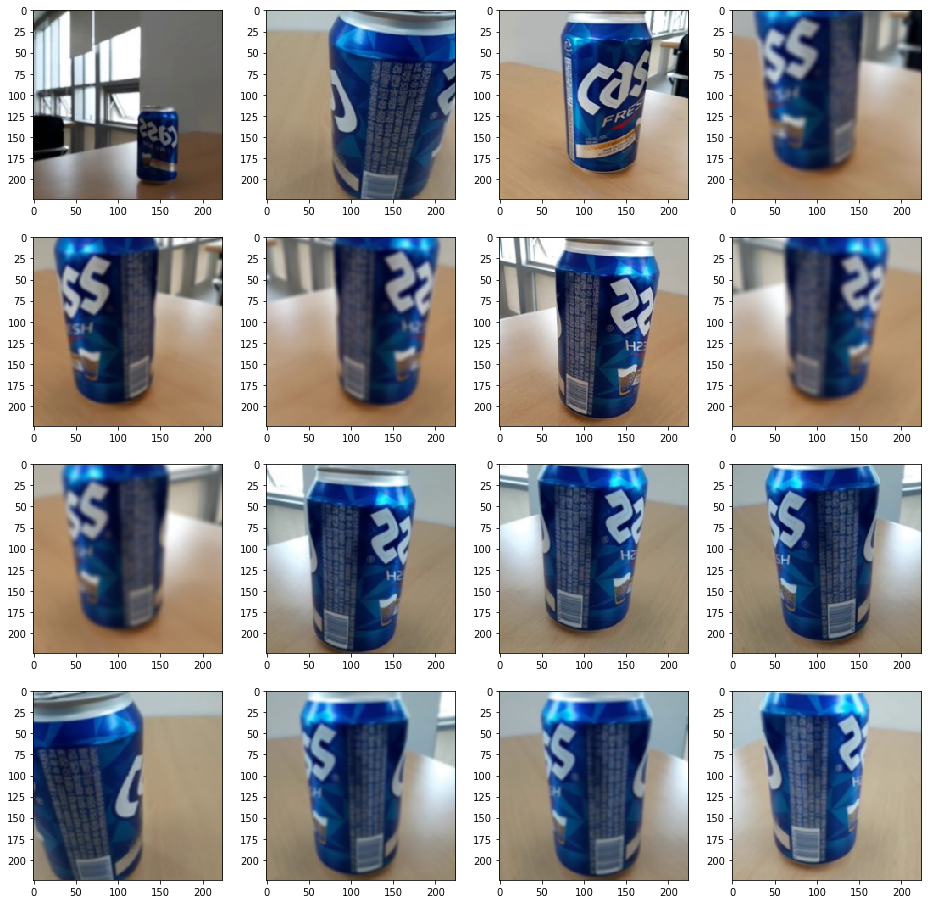

In [53]:
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = images_aug[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

## Save augmented images

In [55]:
from PIL import Image
import os, sys

path_aug = path+"softAug/"
def saveImages():
    i=0
    for img in images_aug:
        cv2.imwrite(os.path.join(path_aug , os.path.basename(fps[i])), cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        i+=1
        
saveImages()

### case 2) Flip, Crop, GaussianBlur, Contrast, Gaussian noise, Ligteness, Affine ( rigbody transform + shear )

In [56]:
import imgaug.augmenters as iaa

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    iaa.Sometimes(0.5, # gaussian blur with random sigma 0~0.5 in half of images
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    iaa.ContrastNormalization((0.75, 1.5)),# Strengthen or weaken the contrast in each image.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),    # Add gaussian noise.
    iaa.Multiply((0.8, 1.2), per_channel=0.2), # configure lighteness
    iaa.Affine(    # Affine Transform : Scale/zoom them, translate/move them, rotate them and shear them.
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

images_aug = seq(images=images)

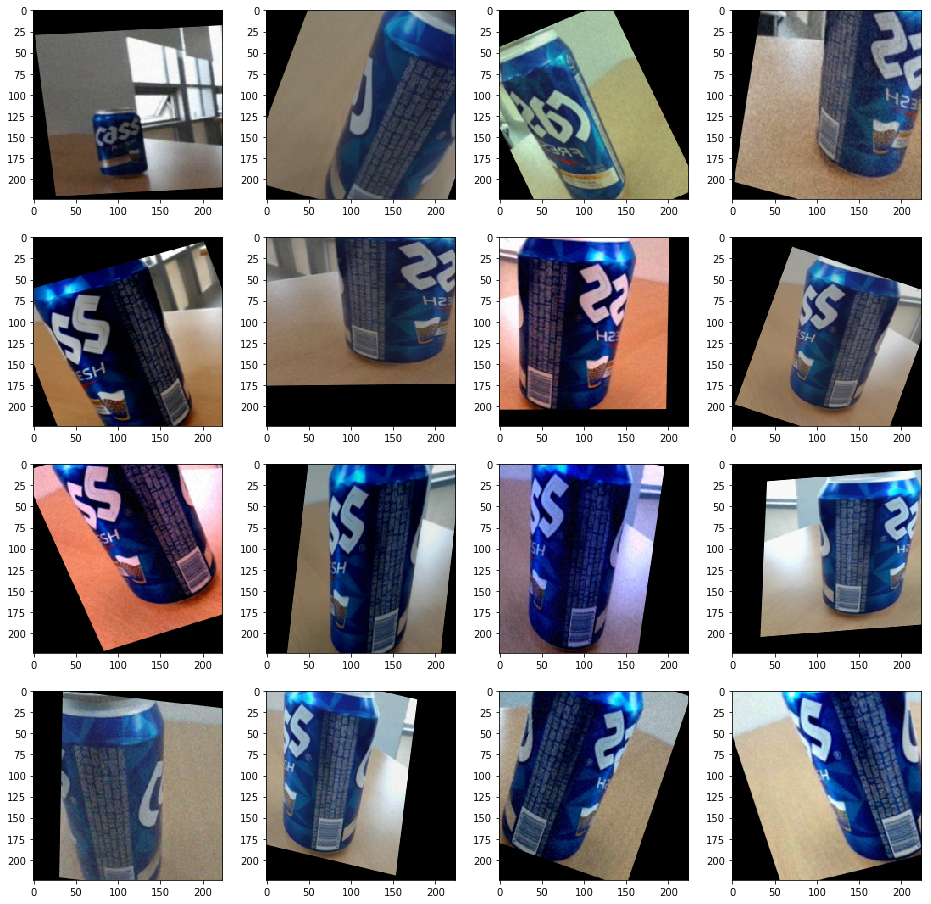

In [57]:
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = images_aug[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

## Save augmented images

In [58]:
from PIL import Image
import os, sys

path_aug = path+"hardAug/"
def saveImages():
    i=0
    for img in images_aug:
        cv2.imwrite(os.path.join(path_aug , os.path.basename(fps[i])), cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        i+=1
        
saveImages()